In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [4]:
df_moe = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_moe.csv')
df_moe = df_moe.iloc[12:, :]
df_lowsev = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_lowsev.csv')
df_highsev = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_highsev.csv')
#df_highsev = df_highsev.iloc[:25, :]
df_proto = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_prototype.csv')
df_pid = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_pid.csv')
df_ppo = pd.read_csv(r'C:\Users\michellexu\Pulse\engine\src\python\pulse\rl-hemorrhage-resuscitation\final_system\eval_data_csvs\eval_data_highsev_ppo.csv')
df_ppo = df_ppo.iloc[:25, :]

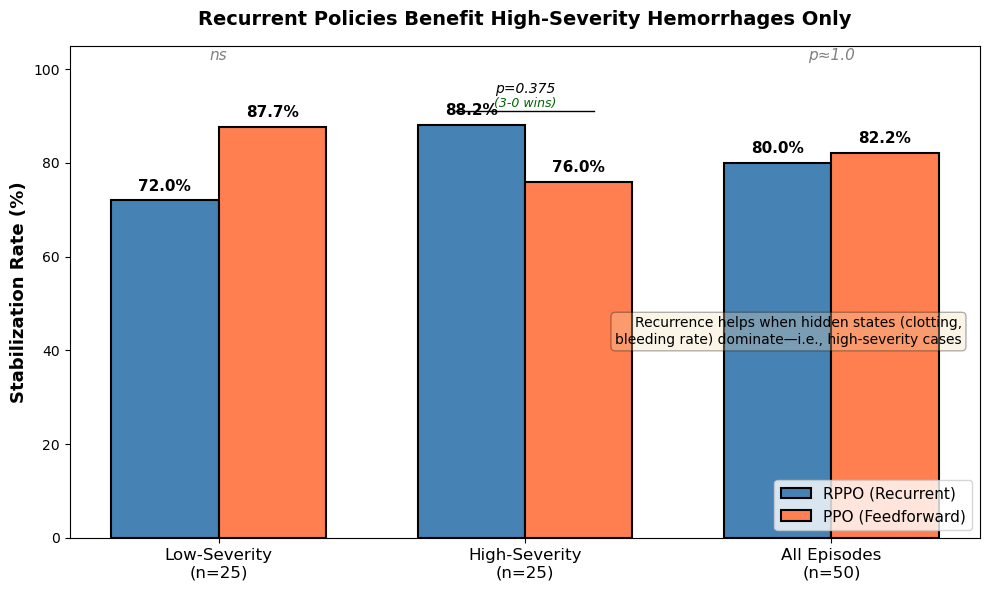

In [5]:
# Your actual data
categories = ['Low-Severity\n(n=25)', 'High-Severity\n(n=25)', 'All Episodes\n(n=50)']
rppo_rates = [72, 88.2, 80]  # Fill in low-sev and overall
ppo_rates = [87.7, 76.0, 82.2]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, rppo_rates, width, label='RPPO (Recurrent)',
                color='steelblue', edgecolor='black', linewidth=1.5)
rects2 = ax.bar(x + width/2, ppo_rates, width, label='PPO (Feedforward)',
                color='coral', edgecolor='black', linewidth=1.5)

ax.set_ylabel('Stabilization Rate (%)', fontsize=13, fontweight='bold')
ax.set_title('Recurrent Policies Benefit High-Severity Hemorrhages Only',
             fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 105])

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

# Add significance annotations
# Low-severity: no difference
ax.text(0, 102, 'ns', ha='center', fontsize=11, style='italic', color='gray')

# High-severity: trend
ax.text(1, 95, 'p=0.375', ha='center', fontsize=10, style='italic')
ax.text(1, 92, '(3-0 wins)', ha='center', fontsize=9, style='italic', color='darkgreen')
ax.plot([1-width/2-0.05, 1+width/2+0.05], [91, 91], 'k-', linewidth=1)

# Overall: no difference (as expected)
ax.text(2, 102, 'p≈1.0', ha='center', fontsize=11, style='italic', color='gray')

# Add interpretation box
textstr = 'Recurrence helps when hidden states (clotting,\nbleeding rate) dominate—i.e., high-severity cases'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.98, 0.45, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.savefig('rppo_severity_stratified.png', dpi=300, bbox_inches='tight')
plt.show()

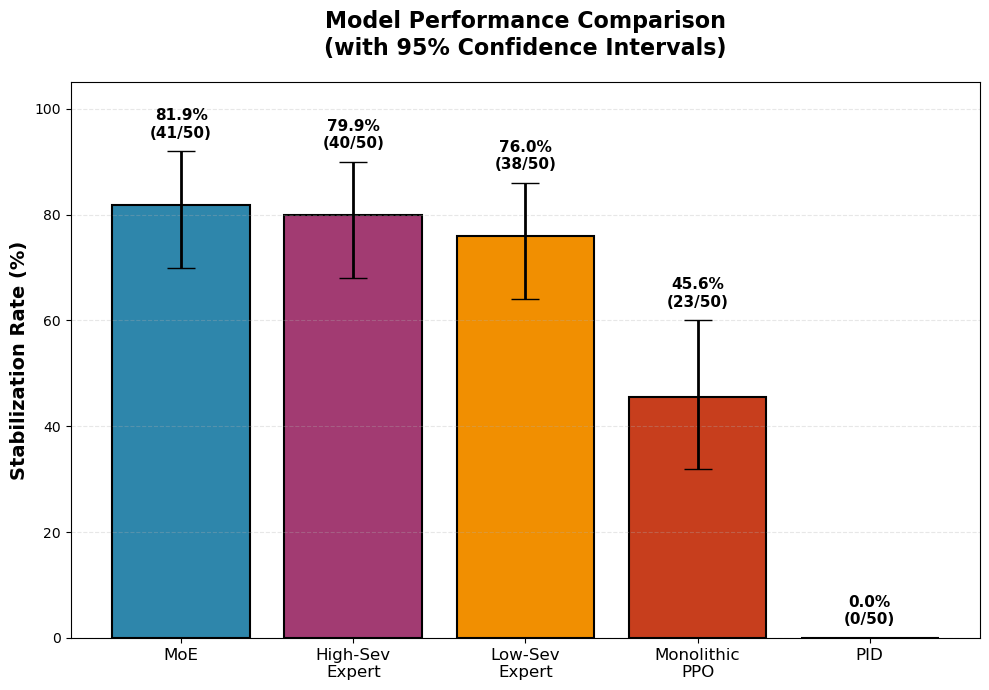

✓ Stabilization rates bar chart saved!
   Saved as: stabilization_rates_comparison.png


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# YOUR DATA - FILL THESE IN with your actual values
models = ['MoE', 'High-Sev\nExpert', 'Low-Sev\nExpert', 'Monolithic\nPPO', 'PID']

# Success rates (percentages)
success_rates = [81.9, 79.9, 75.96, 45.6, 0.0]

# Number of successes and totals (for labeling)
n_successes = [41, 40, 38, 23, 0]
n_total = [50, 50, 50, 50, 50]

# Your bootstrapped 95% CIs - FILL IN YOUR VALUES
# Format: [lower_bound, upper_bound] for each model
ci_moe = [70.0, 92.0]           # Example: MoE is 91-97%
ci_highsev = [68.0, 90.0]       # Example: High-Sev is 88-95%
ci_lowsev = [64.0, 86.0]
ci_proto = [32.0, 60.0] # Example: PPO is 71-84%
ci_pid = [0.0, 0.0]             # Example: PID is 0-6%

# Calculate error bar lengths
# (how far below and above the mean point)
error_lower = [
    success_rates[0] - ci_moe[0],
    success_rates[1] - ci_highsev[0],
    success_rates[2] - ci_lowsev[0],
    success_rates[3] - ci_proto[0],
    success_rates[4] - ci_pid[0]
]

error_upper = [
    ci_moe[1] - success_rates[0],
    ci_highsev[1] - success_rates[1],
    ci_lowsev[1] - success_rates[2],
    ci_proto[1] - success_rates[3],
    ci_pid[1] - success_rates[4]
]

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create bars
x_pos = np.arange(len(models))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

bars = ax.bar(x_pos, success_rates,
              yerr=[error_lower, error_upper],
              color=colors,
              edgecolor='black',
              linewidth=1.5,
              capsize=10,
              error_kw={'linewidth': 2, 'ecolor': 'black'})

# Formatting
ax.set_ylabel('Stabilization Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison\n(with 95% Confidence Intervals)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, success_rates)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error_upper[i] + 2,
            f'{rate:.1f}%\n({n_successes[i]}/{n_total[i]})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add significance annotations
# MoE vs PPO (p < 0.001)
#ax.plot([0, 2], [100, 100], 'k-', linewidth=1.5)
#ax.text(1, 101, 'p < 0.001***', ha='center', fontsize=12, fontweight='bold')

# Optional: MoE vs High-Sev (p = 0.18, not significant)
# Uncomment if you want to show this too
# ax.plot([0, 1], [97, 97], 'k-', linewidth=1, alpha=0.5)
# ax.text(0.5, 98, 'p = 0.18 (ns)', ha='center', fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.savefig('stabilization_rates_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Stabilization rates bar chart saved!")
print(f"   Saved as: stabilization_rates_comparison.png")

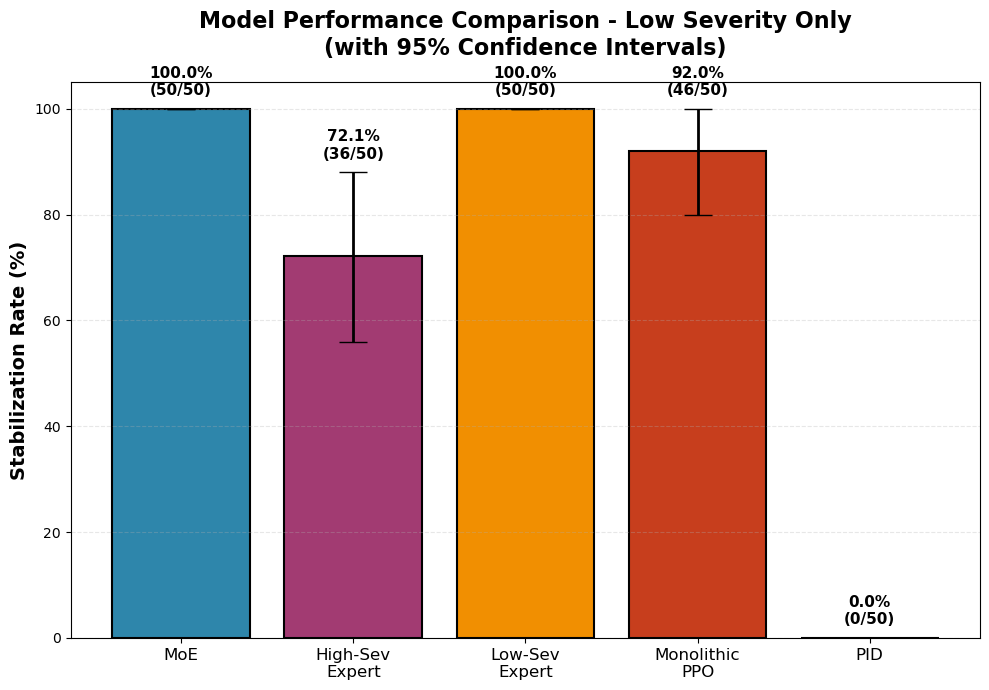

✓ Stabilization rates bar chart saved!
   Saved as: stabilization_rates_lowsev_comparison.png


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# YOUR DATA - FILL THESE IN with your actual values
models = ['MoE', 'High-Sev\nExpert', 'Low-Sev\nExpert', 'Monolithic\nPPO', 'PID']

# Success rates (percentages)
success_rates = [100.0, 72.09, 100.0, 92.04, 0.0]

# Number of successes and totals (for labeling)
n_successes = [50, 36, 50, 46, 0]
n_total = [50, 50, 50, 50, 50]

# Your bootstrapped 95% CIs - FILL IN YOUR VALUES
# Format: [lower_bound, upper_bound] for each model
ci_moe = [100.0, 100.0]           # Example: MoE is 91-97%
ci_highsev = [56.0, 88.0]       # Example: High-Sev is 88-95%
ci_lowsev = [100.0, 100.0]
ci_proto = [80.0, 100.0] # Example: PPO is 71-84%
ci_pid = [0.0, 0.0]             # Example: PID is 0-6%

# Calculate error bar lengths
# (how far below and above the mean point)
error_lower = [
    success_rates[0] - ci_moe[0],
    success_rates[1] - ci_highsev[0],
    success_rates[2] - ci_lowsev[0],
    success_rates[3] - ci_proto[0],
    success_rates[4] - ci_pid[0]
]

error_upper = [
    ci_moe[1] - success_rates[0],
    ci_highsev[1] - success_rates[1],
    ci_lowsev[1] - success_rates[2],
    ci_proto[1] - success_rates[3],
    ci_pid[1] - success_rates[4]
]

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create bars
x_pos = np.arange(len(models))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

bars = ax.bar(x_pos, success_rates,
              yerr=[error_lower, error_upper],
              color=colors,
              edgecolor='black',
              linewidth=1.5,
              capsize=10,
              error_kw={'linewidth': 2, 'ecolor': 'black'})

# Formatting
ax.set_ylabel('Stabilization Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison - Low Severity Only\n(with 95% Confidence Intervals)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, success_rates)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error_upper[i] + 2,
            f'{rate:.1f}%\n({n_successes[i]}/{n_total[i]})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('stabilization_rates_lowsev_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Stabilization rates bar chart saved!")
print(f"   Saved as: stabilization_rates_lowsev_comparison.png")

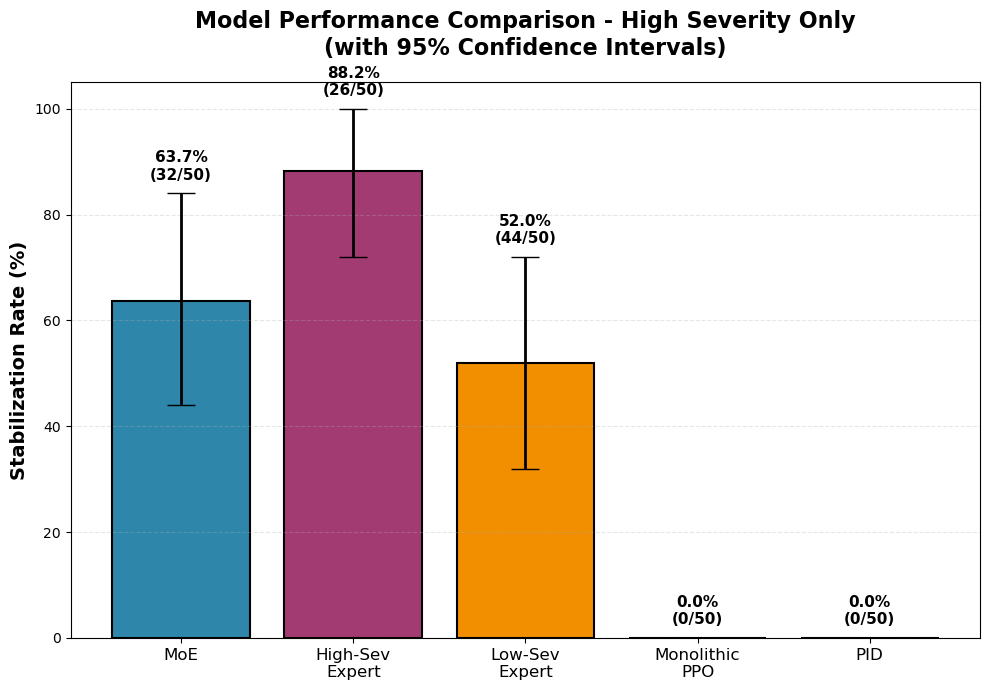

✓ Stabilization rates bar chart saved!
   Saved as: stabilization_rates_highsev_comparison.png


In [13]:
# YOUR DATA - FILL THESE IN with your actual values
models = ['MoE', 'High-Sev\nExpert', 'Low-Sev\nExpert', 'Monolithic\nPPO', 'PID']

# Success rates (percentages)
success_rates = [63.7, 88.16, 52.05, 0.0, 0.0]

# Number of successes and totals (for labeling)
n_successes = [32, 26, 44, 0, 0]
n_total = [50, 50, 50, 50, 50]

# Your bootstrapped 95% CIs - FILL IN YOUR VALUES
# Format: [lower_bound, upper_bound] for each model
ci_moe = [44.0, 84.0]           # Example: MoE is 91-97%
ci_highsev = [72.0, 100.0]       # Example: High-Sev is 88-95%
ci_lowsev = [32.0, 72.0]
ci_proto = [0.0, 0.0] # Example: PPO is 71-84%
ci_pid = [0.0, 0.0]             # Example: PID is 0-6%

# Calculate error bar lengths
# (how far below and above the mean point)
error_lower = [
    success_rates[0] - ci_moe[0],
    success_rates[1] - ci_highsev[0],
    success_rates[2] - ci_lowsev[0],
    success_rates[3] - ci_proto[0],
    success_rates[4] - ci_pid[0]
]

error_upper = [
    ci_moe[1] - success_rates[0],
    ci_highsev[1] - success_rates[1],
    ci_lowsev[1] - success_rates[2],
    ci_proto[1] - success_rates[3],
    ci_pid[1] - success_rates[4]
]

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create bars
x_pos = np.arange(len(models))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

bars = ax.bar(x_pos, success_rates,
              yerr=[error_lower, error_upper],
              color=colors,
              edgecolor='black',
              linewidth=1.5,
              capsize=10,
              error_kw={'linewidth': 2, 'ecolor': 'black'})

# Formatting
ax.set_ylabel('Stabilization Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('Model Performance Comparison - High Severity Only\n(with 95% Confidence Intervals)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, rate) in enumerate(zip(bars, success_rates)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + error_upper[i] + 2,
            f'{rate:.1f}%\n({n_successes[i]}/{n_total[i]})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('stabilization_rates_highsev_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Stabilization rates bar chart saved!")
print(f"   Saved as: stabilization_rates_highsev_comparison.png")

C:\Users\michellexu\AppData\Local\Temp\ipykernel_17180\2919813038.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,


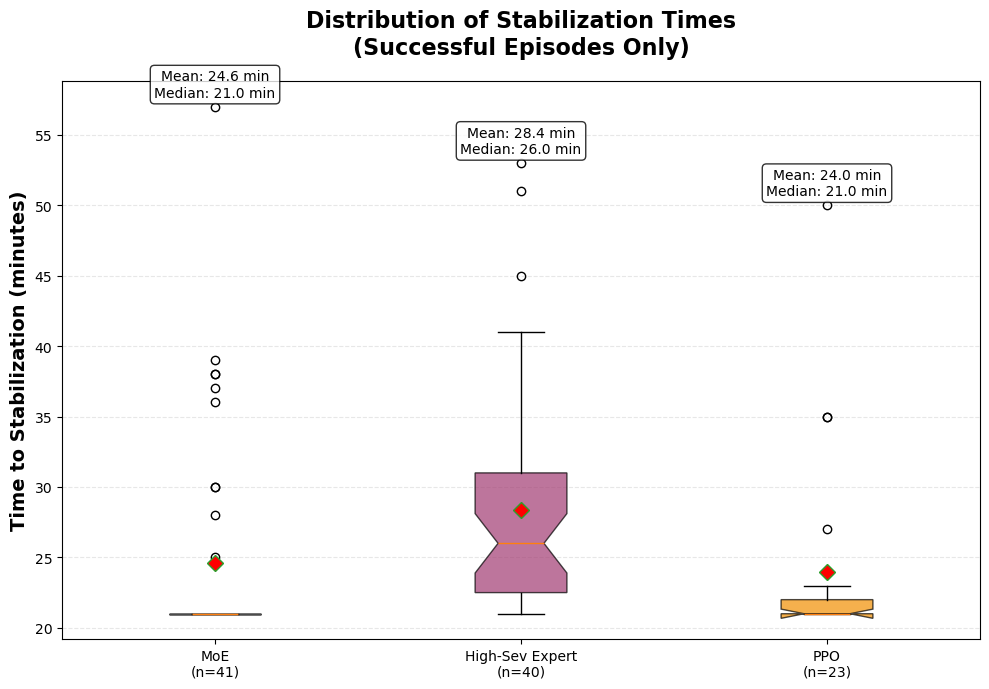

✓ Time to stabilization box plot saved!


In [19]:
moe_times = (df_moe[df_moe['outcome'] == 'stabilization'])['length'].values
highsev_times = (df_highsev[df_highsev['outcome'] == 'stabilization'])['length'].values
ppo_times = (df_proto[df_proto['outcome'] == 'stabilization'])['length'].values

# Prepare data
data_to_plot = [moe_times, highsev_times, ppo_times]
labels = ['MoE\n(n={})'.format(len(moe_times)),
          'High-Sev Expert\n(n={})'.format(len(highsev_times)),
          'PPO\n(n={})'.format(len(ppo_times))]
colors = ['#2E86AB', '#A23B72', '#F18F01']

# Create figure
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plot
bp = ax.boxplot(data_to_plot,
                labels=labels,
                patch_artist=True,
                notch=True,  # Notched box plot shows confidence interval
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Formatting
ax.set_ylabel('Time to Stabilization (minutes)', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Stabilization Times\n(Successful Episodes Only)',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add mean values as text
for i, times in enumerate(data_to_plot):
    mean_val = np.mean(times)
    median_val = np.median(times)
    ax.text(i+1, max(times) + 0.5,
            f'Mean: {mean_val:.1f} min\nMedian: {median_val:.1f} min',
            ha='center', va='bottom', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('time_to_stabilization_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Time to stabilization box plot saved!")

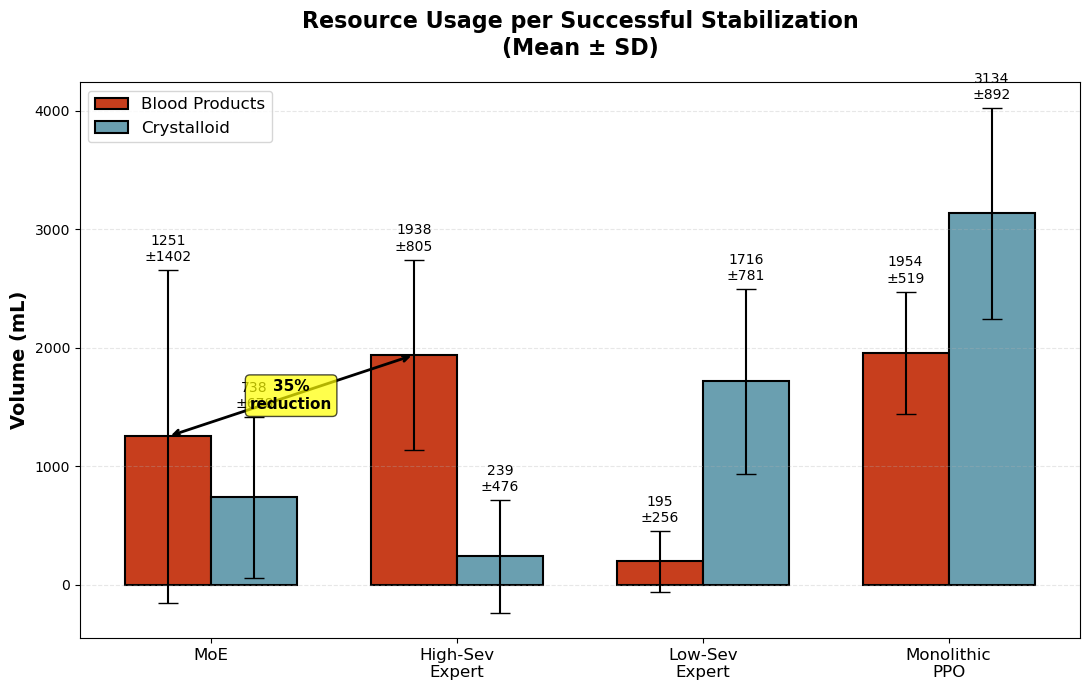

✓ Fluid usage comparison saved!


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean usage for successful episodes
def get_mean_fluid_usage(df):
    successful = df[df['outcome'] == 'stabilization']

    blood = np.mean(successful['blood_total'].values)
    blood_std = np.std(successful['blood_total'].values)

    crystalloid = np.mean(successful['cryst_total'].values)
    crystalloid_std = np.std(successful['cryst_total'].values)

    return blood, blood_std, crystalloid, crystalloid_std

# Get data for each model
moe_blood, moe_blood_std, moe_cryst, moe_cryst_std = get_mean_fluid_usage(df_moe)
highsev_blood, highsev_blood_std, highsev_cryst, highsev_cryst_std = get_mean_fluid_usage(df_highsev)
lowsev_blood, lowsev_blood_std, lowsev_cryst, lowsev_cryst_std = get_mean_fluid_usage(df_lowsev)
ppo_blood, ppo_blood_std, ppo_cryst, ppo_cryst_std = get_mean_fluid_usage(df_proto)

# Prepare data
models = ['MoE', 'High-Sev\nExpert', 'Low-Sev\nExpert', 'Monolithic\nPPO']
blood_means = [moe_blood, highsev_blood, lowsev_blood, ppo_blood]
blood_stds = [moe_blood_std, highsev_blood_std, lowsev_blood_std, ppo_blood_std]
cryst_means = [moe_cryst, highsev_cryst, lowsev_cryst, ppo_cryst]
cryst_stds = [moe_cryst_std, highsev_cryst_std, lowsev_cryst_std, ppo_cryst_std]

# Create figure
fig, ax = plt.subplots(figsize=(11, 7))

x = np.arange(len(models))
width = 0.35

# Create bars
bars1 = ax.bar(x - width/2, blood_means, width,
               yerr=blood_stds,
               label='Blood Products',
               color='#C73E1D',
               edgecolor='black',
               linewidth=1.5,
               capsize=7)

bars2 = ax.bar(x + width/2, cryst_means, width,
               yerr=cryst_stds,
               label='Crystalloid',
               color='#6A9FB0',
               edgecolor='black',
               linewidth=1.5,
               capsize=7)

# Formatting
ax.set_ylabel('Volume (mL)', fontsize=14, fontweight='bold')
ax.set_title('Resource Usage per Successful Stabilization\n(Mean ± SD)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
def add_value_labels(bars, values, stds):
    for bar, val, std in zip(bars, values, stds):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + std + 50,
                f'{val:.0f}\n±{std:.0f}',
                ha='center', va='bottom', fontsize=10)

add_value_labels(bars1, blood_means, blood_stds)
add_value_labels(bars2, cryst_means, cryst_stds)

# Add annotation showing MoE reduction
if highsev_blood > moe_blood:
    reduction = ((highsev_blood - moe_blood) / highsev_blood) * 100
    ax.annotate('', xy=(0-width/2, moe_blood), xytext=(1-width/2, highsev_blood),
                arrowprops=dict(arrowstyle='<->', color='black', lw=2))
    ax.text(0.5-width/2, (moe_blood + highsev_blood)/2,
            f'{reduction:.0f}%\nreduction',
            ha='center', va='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('fluid_usage_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Fluid usage comparison saved!")

In [30]:
# Feature ablation heatmap
# Create the data
# Rows = Models, Columns = Features
# Values = Performance drop when that feature is ablated (percentage points)

data = {
    'MAP': [4, 18, 7.2, 9.8],      # Example: MoE loses 46.2pp when MAP ablated
    'HR': [8, 66, 2, 0],
    'SAP': [26, 56, 6.1, 3.4],
    'SkinTemp': [16, 26, 0, -4.4],
    'ETCO2': [2, 22, 0, -4.4],
    'RespRate': [8, 23.5, 0, -2.4],
    'SpO2': [-1.8, 24, 0, -6.7]      # Make sure this is DECIMAL not percent!
}

# Model names
models = ['MoE', 'High-Sev Expert', 'Low-Sev Expert', 'Monolithic PPO']

# Create DataFrame
df = pd.DataFrame(data, index=models)

print(df)

                  MAP  HR   SAP  SkinTemp  ETCO2  RespRate  SpO2
MoE               4.0   8  26.0      16.0    2.0       8.0  -1.8
High-Sev Expert  18.0  66  56.0      26.0   22.0      23.5  24.0
Low-Sev Expert    7.2   2   6.1       0.0    0.0       0.0   0.0
Monolithic PPO    9.8   0   3.4      -4.4   -4.4      -2.4  -6.7


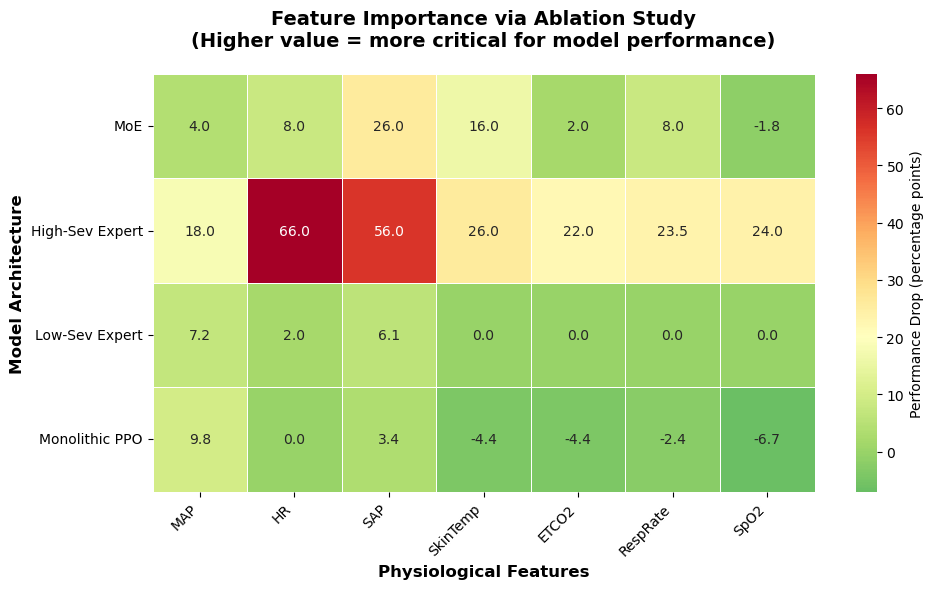

✓ Feature ablation heatmap saved!


In [33]:
# Create figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(
    df,
    annot=True,           # Show numbers in cells
    fmt='.1f',            # Format: 1 decimal place
    cmap='RdYlGn_r',      # Red = high importance, Green = low importance
    cbar_kws={'label': 'Performance Drop (percentage points)'},
    linewidths=0.5,       # Lines between cells
    linecolor='white',
    vmin=-7,               # Minimum value for color scale
    vmax=66,              # Maximum value (adjust based on your data)
    center=20             # Center of color scale (optional)
)

# Formatting
plt.title('Feature Importance via Ablation Study\n(Higher value = more critical for model performance)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Physiological Features', fontsize=12, fontweight='bold')
plt.ylabel('Model Architecture', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('feature_ablation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature ablation heatmap saved!")

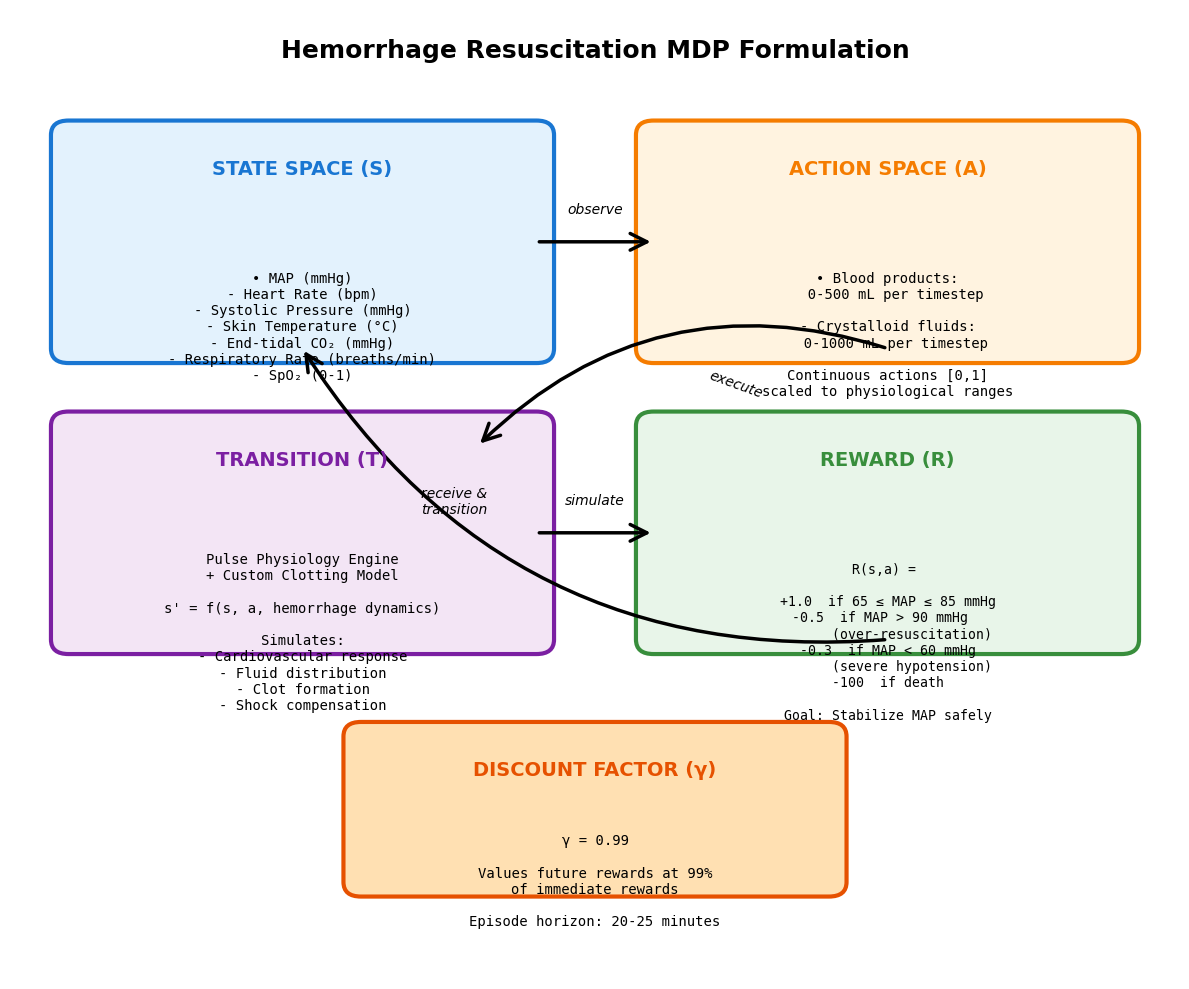

✓ MDP formulation diagram saved!


In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Title
ax.text(5, 9.5, 'Hemorrhage Resuscitation MDP Formulation',
        ha='center', fontsize=18, fontweight='bold')

# STATE BOX
state_box = FancyBboxPatch((0.5, 6.5), 4, 2.2,
                            boxstyle="round,pad=0.15",
                            facecolor='#E3F2FD', edgecolor='#1976D2', linewidth=3)
ax.add_patch(state_box)

ax.text(2.5, 8.3, 'STATE SPACE (S)', ha='center', fontsize=14, fontweight='bold', color='#1976D2')
state_text = '''• MAP (mmHg)
- Heart Rate (bpm)
- Systolic Pressure (mmHg)
- Skin Temperature (°C)
- End-tidal CO₂ (mmHg)
- Respiratory Rate (breaths/min)
- SpO₂ (0-1)'''
ax.text(2.5, 7.3, state_text, ha='center', va='top', fontsize=10, family='monospace')

# ACTION BOX
action_box = FancyBboxPatch((5.5, 6.5), 4, 2.2,
                             boxstyle="round,pad=0.15",
                             facecolor='#FFF3E0', edgecolor='#F57C00', linewidth=3)
ax.add_patch(action_box)

ax.text(7.5, 8.3, 'ACTION SPACE (A)', ha='center', fontsize=14, fontweight='bold', color='#F57C00')
action_text = '''• Blood products:
  0-500 mL per timestep

- Crystalloid fluids:
  0-1000 mL per timestep

Continuous actions [0,1]
scaled to physiological ranges'''
ax.text(7.5, 7.3, action_text, ha='center', va='top', fontsize=10, family='monospace')

# TRANSITION BOX
trans_box = FancyBboxPatch((0.5, 3.5), 4, 2.2,
                            boxstyle="round,pad=0.15",
                            facecolor='#F3E5F5', edgecolor='#7B1FA2', linewidth=3)
ax.add_patch(trans_box)

ax.text(2.5, 5.3, 'TRANSITION (T)', ha='center', fontsize=14, fontweight='bold', color='#7B1FA2')
trans_text = '''Pulse Physiology Engine
+ Custom Clotting Model

s' = f(s, a, hemorrhage dynamics)

Simulates:
- Cardiovascular response
- Fluid distribution
- Clot formation
- Shock compensation'''
ax.text(2.5, 4.4, trans_text, ha='center', va='top', fontsize=10, family='monospace')

# REWARD BOX
reward_box = FancyBboxPatch((5.5, 3.5), 4, 2.2,
                             boxstyle="round,pad=0.15",
                             facecolor='#E8F5E9', edgecolor='#388E3C', linewidth=3)
ax.add_patch(reward_box)

ax.text(7.5, 5.3, 'REWARD (R)', ha='center', fontsize=14, fontweight='bold', color='#388E3C')
reward_text = '''R(s,a) =

+1.0  if 65 ≤ MAP ≤ 85 mmHg
-0.5  if MAP > 90 mmHg
      (over-resuscitation)
-0.3  if MAP < 60 mmHg
      (severe hypotension)
-100  if death

Goal: Stabilize MAP safely'''
ax.text(7.5, 4.3, reward_text, ha='center', va='top', fontsize=9.5, family='monospace')

# GAMMA BOX
gamma_box = FancyBboxPatch((3, 1), 4, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#FFE0B2', edgecolor='#E65100', linewidth=3)
ax.add_patch(gamma_box)

ax.text(5, 2.1, 'DISCOUNT FACTOR (γ)', ha='center', fontsize=14, fontweight='bold', color='#E65100')
gamma_text = '''γ = 0.99

Values future rewards at 99%
of immediate rewards

Episode horizon: 20-25 minutes'''
ax.text(5, 1.5, gamma_text, ha='center', va='top', fontsize=10, family='monospace')

# arrows showing the cycle
# State to Action
arrow1 = FancyArrowPatch((4.5, 7.6), (5.5, 7.6),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=2.5, color='black')
ax.add_patch(arrow1)
ax.text(5, 7.9, 'observe', ha='center', fontsize=10, style='italic')

# Action to Transition
arrow2 = FancyArrowPatch((7.5, 6.5), (4, 5.5),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=2.5, color='black',
                          connectionstyle="arc3,rad=.3")
ax.add_patch(arrow2)
ax.text(6.2, 6, 'execute', ha='center', fontsize=10, style='italic', rotation=-20)

# Transition to Reward
arrow3 = FancyArrowPatch((4.5, 4.6), (5.5, 4.6),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=2.5, color='black')
ax.add_patch(arrow3)
ax.text(5, 4.9, 'simulate', ha='center', fontsize=10, style='italic')

# Reward back to State
arrow4 = FancyArrowPatch((7.5, 3.5), (2.5, 6.5),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=2.5, color='black',
                          connectionstyle="arc3,rad=-.3")
ax.add_patch(arrow4)
ax.text(3.8, 4.8, 'receive &\ntransition', ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig('mdp_formulation_diagram.png', dpi=300, bbox_inches='tight')
plt.show()

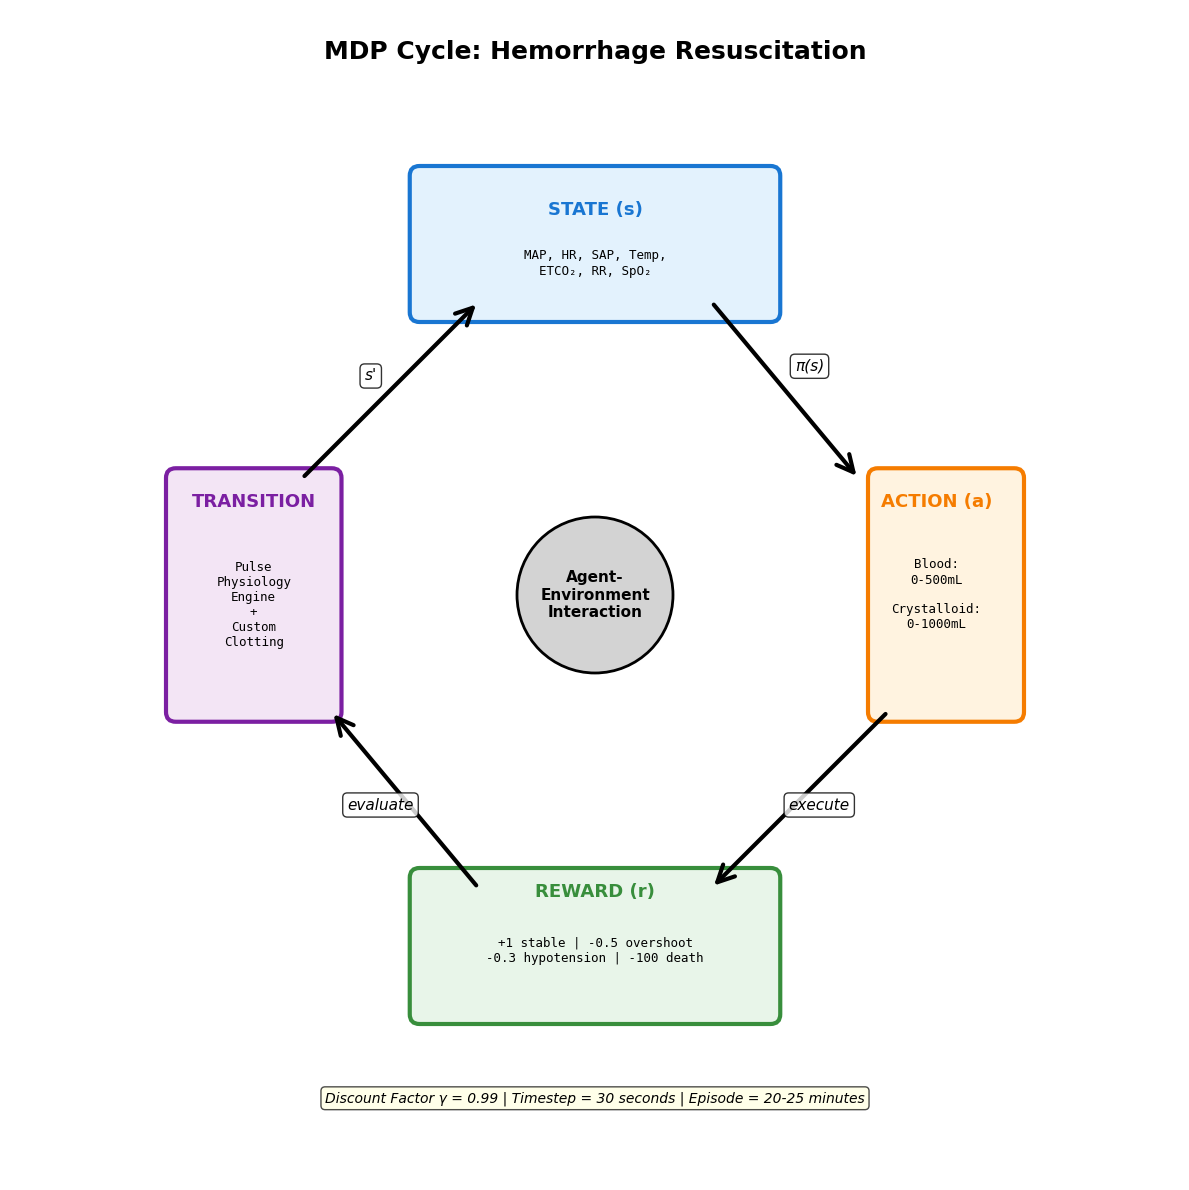

✓ MDP cycle diagram saved!


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, FancyArrowPatch, FancyBboxPatch
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.axis('off')

# Title
ax.text(0, 5.5, 'MDP Cycle: Hemorrhage Resuscitation',
        ha='center', fontsize=18, fontweight='bold')

# Center circle showing the iterative process
center_circle = Circle((0, 0), 0.8, facecolor='lightgray', edgecolor='black', linewidth=2)
ax.add_patch(center_circle)
ax.text(0, 0, 'Agent-\nEnvironment\nInteraction', ha='center', va='center',
        fontsize=11, fontweight='bold')

# Positions for each component (clockwise from top)
positions = {
    'state': (0, 3.5),
    'action': (3.5, 0),
    'reward': (0, -3.5),
    'transition': (-3.5, 0)
}

colors = {
    'state': '#E3F2FD',
    'action': '#FFF3E0',
    'reward': '#E8F5E9',
    'transition': '#F3E5F5'
}

edge_colors = {
    'state': '#1976D2',
    'action': '#F57C00',
    'reward': '#388E3C',
    'transition': '#7B1FA2'
}

# STATE (top)
state_box = FancyBboxPatch((positions['state'][0]-1.8, positions['state'][1]-0.6),
                            3.6, 1.4,
                            boxstyle="round,pad=0.1",
                            facecolor=colors['state'],
                            edgecolor=edge_colors['state'], linewidth=3)
ax.add_patch(state_box)
ax.text(positions['state'][0], positions['state'][1]+0.4, 'STATE (s)',
        ha='center', fontsize=13, fontweight='bold', color=edge_colors['state'])
ax.text(positions['state'][0], positions['state'][1]-0.1,
        'MAP, HR, SAP, Temp,\nETCO₂, RR, SpO₂',
        ha='center', va='center', fontsize=9, family='monospace')

# ACTION (right)
action_box = FancyBboxPatch((positions['action'][0]-0.6, positions['action'][1]-1.2),
                             1.4, 2.4,
                             boxstyle="round,pad=0.1",
                             facecolor=colors['action'],
                             edgecolor=edge_colors['action'], linewidth=3)
ax.add_patch(action_box)
ax.text(positions['action'][0], positions['action'][1]+0.9, 'ACTION (a)',
        ha='center', fontsize=13, fontweight='bold', color=edge_colors['action'])
ax.text(positions['action'][0], positions['action'][1],
        'Blood:\n0-500mL\n\nCrystalloid:\n0-1000mL',
        ha='center', va='center', fontsize=9, family='monospace')

# REWARD (bottom)
reward_box = FancyBboxPatch((positions['reward'][0]-1.8, positions['reward'][1]-0.8),
                             3.6, 1.4,
                             boxstyle="round,pad=0.1",
                             facecolor=colors['reward'],
                             edgecolor=edge_colors['reward'], linewidth=3)
ax.add_patch(reward_box)
ax.text(positions['reward'][0], positions['reward'][1]+0.4, 'REWARD (r)',
        ha='center', fontsize=13, fontweight='bold', color=edge_colors['reward'])
ax.text(positions['reward'][0], positions['reward'][1]-0.15,
        '+1 stable | -0.5 overshoot\n-0.3 hypotension | -100 death',
        ha='center', va='center', fontsize=9, family='monospace')

# TRANSITION (left)
trans_box = FancyBboxPatch((positions['transition'][0]-0.8, positions['transition'][1]-1.2),
                            1.6, 2.4,
                            boxstyle="round,pad=0.1",
                            facecolor=colors['transition'],
                            edgecolor=edge_colors['transition'], linewidth=3)
ax.add_patch(trans_box)
ax.text(positions['transition'][0], positions['transition'][1]+0.9, 'TRANSITION',
        ha='center', fontsize=13, fontweight='bold', color=edge_colors['transition'])
ax.text(positions['transition'][0], positions['transition'][1]-0.1,
        'Pulse\nPhysiology\nEngine\n+\nCustom\nClotting',
        ha='center', va='center', fontsize=9, family='monospace')

# Arrows forming cycle
# State -> Action
arrow1 = FancyArrowPatch((1.2, 3), (2.7, 1.2),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=3, color='black')
ax.add_patch(arrow1)
ax.text(2.2, 2.3, 'π(s)', ha='center', fontsize=11, style='italic',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Action -> Reward
arrow2 = FancyArrowPatch((3, -1.2), (1.2, -3),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=3, color='black')
ax.add_patch(arrow2)
ax.text(2.3, -2.2, 'execute', ha='center', fontsize=11, style='italic',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Reward -> Transition
arrow3 = FancyArrowPatch((-1.2, -3), (-2.7, -1.2),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=3, color='black')
ax.add_patch(arrow3)
ax.text(-2.2, -2.2, 'evaluate', ha='center', fontsize=11, style='italic',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Transition -> State
arrow4 = FancyArrowPatch((-3, 1.2), (-1.2, 3),
                          arrowstyle='->', mutation_scale=30,
                          linewidth=3, color='black')
ax.add_patch(arrow4)
ax.text(-2.3, 2.2, "s'", ha='center', fontsize=11, style='italic',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add gamma note
ax.text(0, -5.2, 'Discount Factor γ = 0.99 | Timestep = 30 seconds | Episode = 20-25 minutes',
        ha='center', fontsize=10, style='italic',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()
plt.savefig('mdp_cycle_diagram.png', dpi=300, bbox_inches='tight')
plt.show()